<a href="https://colab.research.google.com/github/RitikArora24/Predictive-Loan-Default-Modelling-with-Deep-Learning/blob/main/Loan%20Default%20Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost

In [ ]:
!pip install --upgrade scikit-learn
!pip install graphviz

In [ ]:
!pip install shap
import shap

In [ ]:
from sklearn import preprocessing
from sklearn import metrics



In [ ]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns

# for models
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
#from sklearn.metrics import plot_roc_curve, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay
from sklearn.feature_selection import SelectFromModel

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.inspection import permutation_importance
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression

# display all the columns and rows
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', None)
# set figure size for single graphs
plt.rcParams['figure.figsize'] = [15, 6]

In [43]:
raw_data = pd.read_csv('/content/drive/MyDrive/Loan_status_2007-2020Q3.gzip', nrows=20*10**5, low_memory=False)

In [44]:
# creating a copy of data to avoid modifying the original dataset
df = raw_data.copy()


In [45]:
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,1077501,1077430,1077175,1076863,1075358
loan_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt,5000.0,2500.0,2400.0,10000.0,3000.0
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0
term,36 months,60 months,36 months,36 months,60 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%
installment,162.87,59.83,84.33,339.31,67.79
grade,B,C,C,C,B
sub_grade,B2,C4,C5,C1,B5


In [46]:
df.shape


(2000000, 142)

In [47]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [48]:
 #check the types of each attribute
df.dtypes.sort_values()

max_bal_bc                                    float64
mo_sin_old_rev_tl_op                          float64
mo_sin_old_il_acct                            float64
delinq_amnt                                   float64
chargeoff_within_12_mths                      float64
bc_util                                       float64
bc_open_to_buy                                float64
avg_cur_bal                                   float64
acc_open_past_24mths                          float64
inq_last_12m                                  float64
total_cu_tl                                   float64
inq_fi                                        float64
total_rev_hi_lim                              float64
all_util                                      float64
hardship_last_payment_amount                  float64
open_rv_24m                                   float64
open_rv_12m                                   float64
il_util                                       float64
total_bal_il                

In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1999999.0,15568.562222,9702.624709,5.000000e+02,8000.0000,13200.000,21000.000000,4.000000e+04
funded_amnt,1999999.0,15562.622556,9700.981493,5.000000e+02,8000.0000,13200.000,21000.000000,4.000000e+04
funded_amnt_inv,1999999.0,15543.715353,9707.369147,0.000000e+00,8000.0000,13100.000,20950.000000,4.000000e+04
installment,1999999.0,456.288773,276.360510,4.930000e+00,254.0300,384.500,611.030000,1.719830e+03
annual_inc,1999995.0,80403.068122,117660.920119,0.000000e+00,47000.0000,66600.000,95800.000000,1.100000e+08
dti,1997062.0,19.467369,17.573534,0.000000e+00,11.9400,18.000,24.880000,9.990000e+02
delinq_2yrs,1999970.0,0.259733,0.791849,0.000000e+00,0.0000,0.000,0.000000,5.800000e+01
fico_range_low,1999999.0,702.997466,34.602260,6.100000e+02,675.0000,695.000,720.000000,8.450000e+02
fico_range_high,1999999.0,706.997696,34.603205,6.140000e+02,679.0000,699.000,724.000000,8.500000e+02
inq_last_6mths,1999970.0,0.555259,0.863899,0.000000e+00,0.0000,0.000,1.000000,3.300000e+01


In [50]:
# create bins for loan_amnt_range
loan_bin = df['loan_amnt'].value_counts(bins=7).sort_values()
loan_bin

(28714.286, 34357.143]    110889
(34357.143, 40000.0]      144073
(23071.429, 28714.286]    180041
(17428.571, 23071.429]    279907
(460.499, 6142.857]       354732
(11785.714, 17428.571]    431898
(6142.857, 11785.714]     498459
Name: loan_amnt, dtype: int64

In [51]:
# label with the round up numbers
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins=7,
                                 labels=['460-6143', '6143-11786', '11786-17429',
                                         '17429-23071','23071-28714','28714-34357',
                                         '34357-40000'])

Text(0.5, 1.0, 'Loan amount range (USD)')

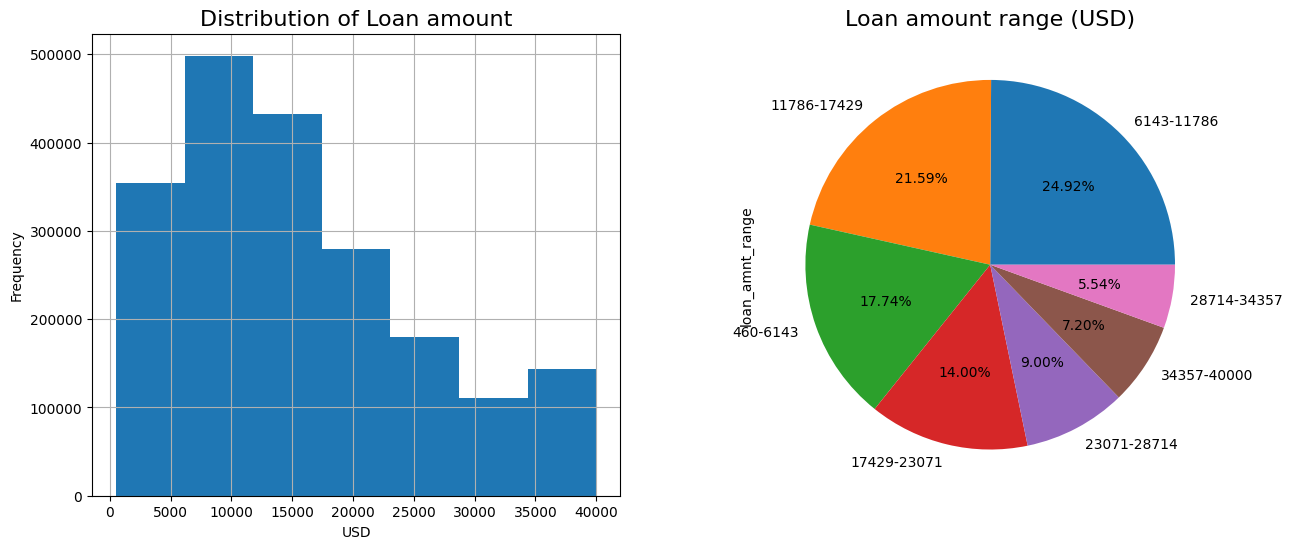

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# distribution of loan amount
df['loan_amnt'].hist(bins=7,ax=axs[0])
axs[0].set_title('Distribution of Loan amount', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("USD")

# pie chart with the same loan mount ranges
df['loan_amnt_range'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Loan amount range (USD$)', fontsize=16)

#for annual income

In [53]:
# create annual_inc_range, based on https://taxsummaries.pwc.com/united-states/individual/taxes-on-personal-income
cat = [(df['annual_inc'] == 0),
    (df['annual_inc']>=1) & (df['annual_inc']<=9950),
    (df['annual_inc']>9950) & (df['annual_inc']<=40525),
    (df['annual_inc']>40525) & (df['annual_inc']<=86375),
    (df['annual_inc']>86375) & (df['annual_inc']<=164925)]

brackets = ['0','1 to 9950','9951 to 40525','40526 to 86375','86376 to 164925']
df['annual_inc_range'] = np.select(cat, brackets)

Text(0.5, 1.0, 'Annual income range (USD)')

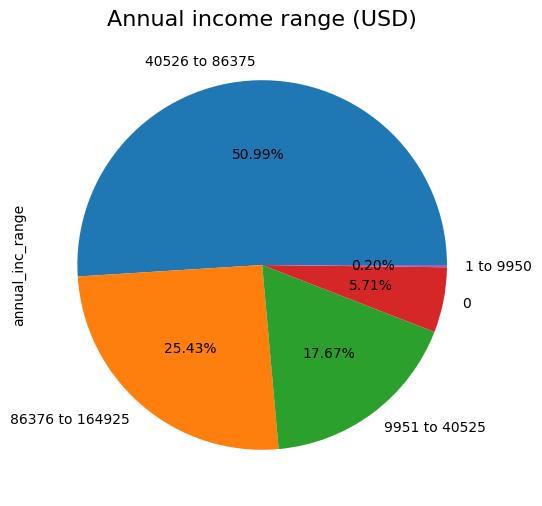

In [54]:
# plot with figures transformed into percentage
df['annual_inc_range'].value_counts().plot.pie(autopct='%.2f%%', figsize=(15, 6))
plt.title('Annual income range (USD)', fontsize=16)

# Interest Rate

In [55]:
# remove '%' and convert 'interest' into numeric type
df['int_rate'] = df['int_rate'].str.replace('%','')
df['int_rate'] = pd.to_numeric(df['int_rate'])
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [56]:
# create bins for int_rate_range, based on https://www.lendingclub.com/foliofn/rateDetail.action
int_bin = df['int_rate'].value_counts(bins=5).sort_values(ascending=True)
int_bin

(25.854, 30.99]                  28761
(20.718, 25.854]                108710
(15.582, 20.718]                415109
(5.2829999999999995, 10.446]    685556
(10.446, 15.582]                761863
Name: int_rate, dtype: int64

In [57]:
# labels with rounded figures
df['int_rate_range'] = pd.cut(df['int_rate'],
                                 bins=5,
                                 labels=['5.2-10.4','10.4-15.5','15.5-20.7','20.7-25.8','25.8-31'])

Text(0.5, 1.0, 'Interest rate range')

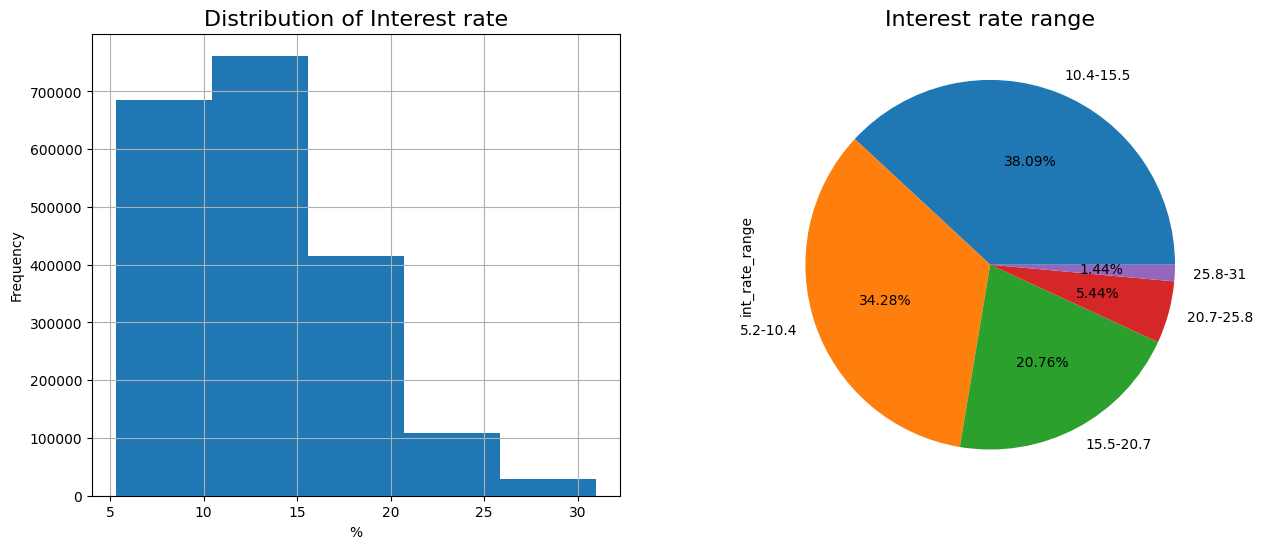

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# histogram
df['int_rate'].hist(bins=5, ax=axs[0])
axs[0].set_title('Distribution of Interest rate', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("%")

# pie chart
df['int_rate_range'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Interest rate range', fontsize=16)

#FICO scores

These are credit scores developed by the Fair Isaac Corporation (FICO),
#Range-
Poor: 300 - 579

Fair: 580 - 669

Good: 670 - 739

Very Good: 740 - 799

Excellent: 800 - 850

In [59]:
# examine the difference between fico_range_high and fico_range_low
df['diff'] = df['fico_range_high'] - df['fico_range_low']
df['diff'].head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: diff, dtype: float64

In [60]:
# check if all the difference is equal to a constant number of 4
df['diff'].value_counts()

4.0    1999540
5.0        459
Name: diff, dtype: int64

In [61]:
# average of FICO scores
df['FICO_average'] = (df['fico_range_high']+df['fico_range_low'])/2
df['FICO_average'].head()

0    737.0
1    742.0
2    737.0
3    692.0
4    697.0
Name: FICO_average, dtype: float64

In [62]:
# convert FICO scores into categories

## conditions
conditions = [(df['FICO_average']<580),
    (df['FICO_average']>580) & (df['FICO_average']<=669),
    (df['FICO_average']>669) & (df['FICO_average']<=739),
    (df['FICO_average']>739) & (df['FICO_average']<=799),
    (df['FICO_average']>=800)]

## categories
rating = ['Poor', 'Fair', 'Good', 'Very_good', 'Exceptional']

## return an array drawn from 2 lists, and add the new column to df
df['FICO_rating'] = np.select(conditions, rating)

Text(0.5, 1.0, 'FICO scores by range')

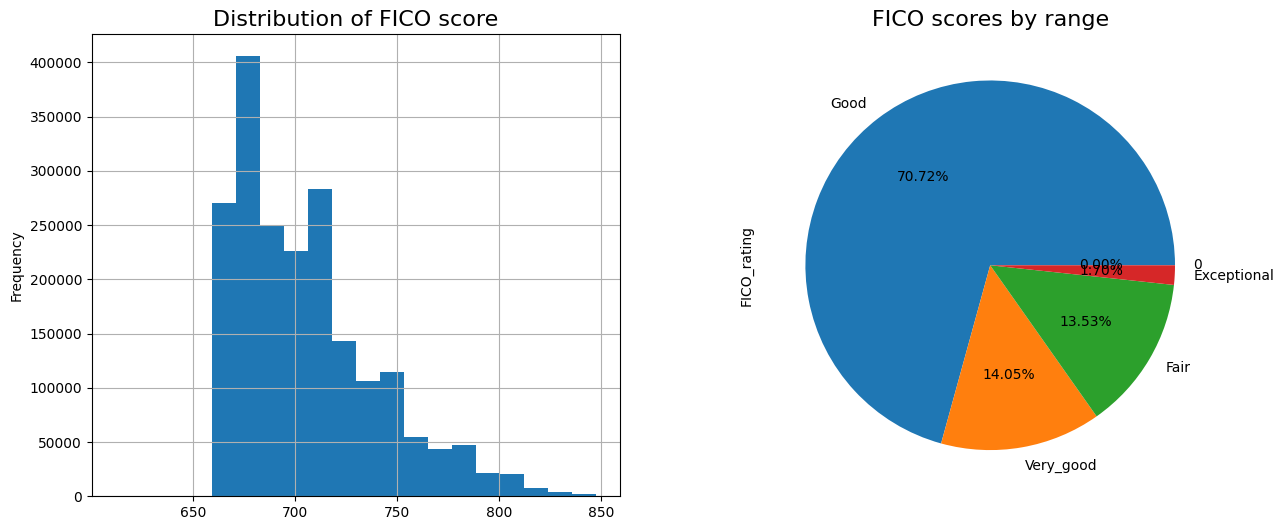

In [63]:
# Distribution
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# histogram
df['FICO_average'].hist(bins=20, ax=axs[0], figsize=(15, 6))
axs[0].set_title('Distribution of FICO score', fontsize=16)
axs[0].set_ylabel('Frequency')

# pie chart
df['FICO_rating'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('FICO scores by range', fontsize=16)

dropping high and low rico score

In [64]:
# drop the features which no longer needed
df.drop(columns=['fico_range_low','fico_range_high', 'diff'], inplace=True)

for categorical data
purpose and loan term

Text(0.5, 1.0, 'Loan term')

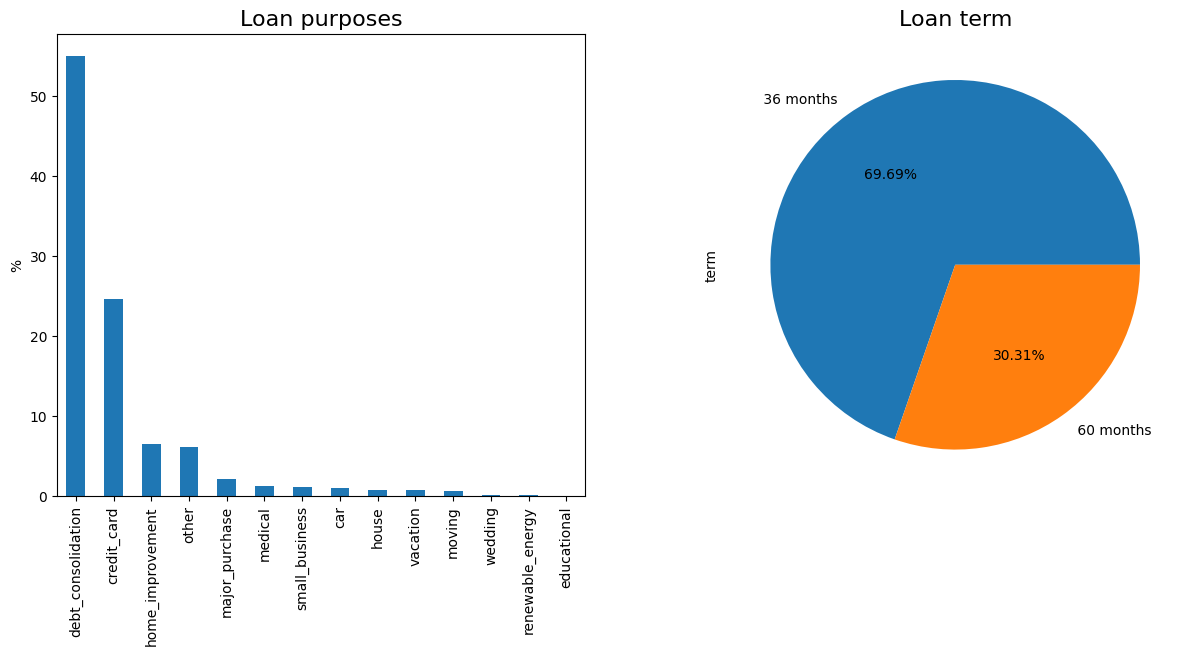

In [65]:
fig, axs = plt.subplots(1,2 , figsize=(15, 6))
# bar chart
df['purpose'].value_counts(normalize=True).mul(100).plot.bar(ax=axs[0])
axs[0].set_title('Loan purposes', fontsize=16)
axs[0].set_ylabel("%")

# pie chart
df['term'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Loan term', fontsize=16)